# Imports

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import spacy 
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer 

In [5]:
metadata = pd.read_csv('../data/processed_metadata.csv')

# Pre-processing Data

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10000)  

# Fitting the TfidfVectorizer to encode the processed_lyrics columns
X_tfidf = tfidf.fit_transform(metadata['processed_lyrics'])

# Converting to a seperate DataFrame for clarity
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[tfidf.get_feature_names_out()])

# Exporting X_tfidf_df to a csv (encoded_processed_lyrics) to data folder
X_tfidf_df.to_csv('../data/encoded_processed_lyrics.csv')

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(metadata['genre'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# stratifying on target to ensure train test split consistency

# Modelling and Model Evaluations - classifying genres from lyrics

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


              precision    recall  f1-score   support

       blues       0.33      0.26      0.29       921
     country       0.47      0.54      0.50      1089
     hip hop       0.66      0.35      0.46       181
        jazz       0.37      0.26      0.30       769
         pop       0.36      0.56      0.43      1408
      reggae       0.51      0.25      0.34       500
        rock       0.38      0.28      0.32       807

    accuracy                           0.39      5675
   macro avg       0.44      0.36      0.38      5675
weighted avg       0.40      0.39      0.38      5675



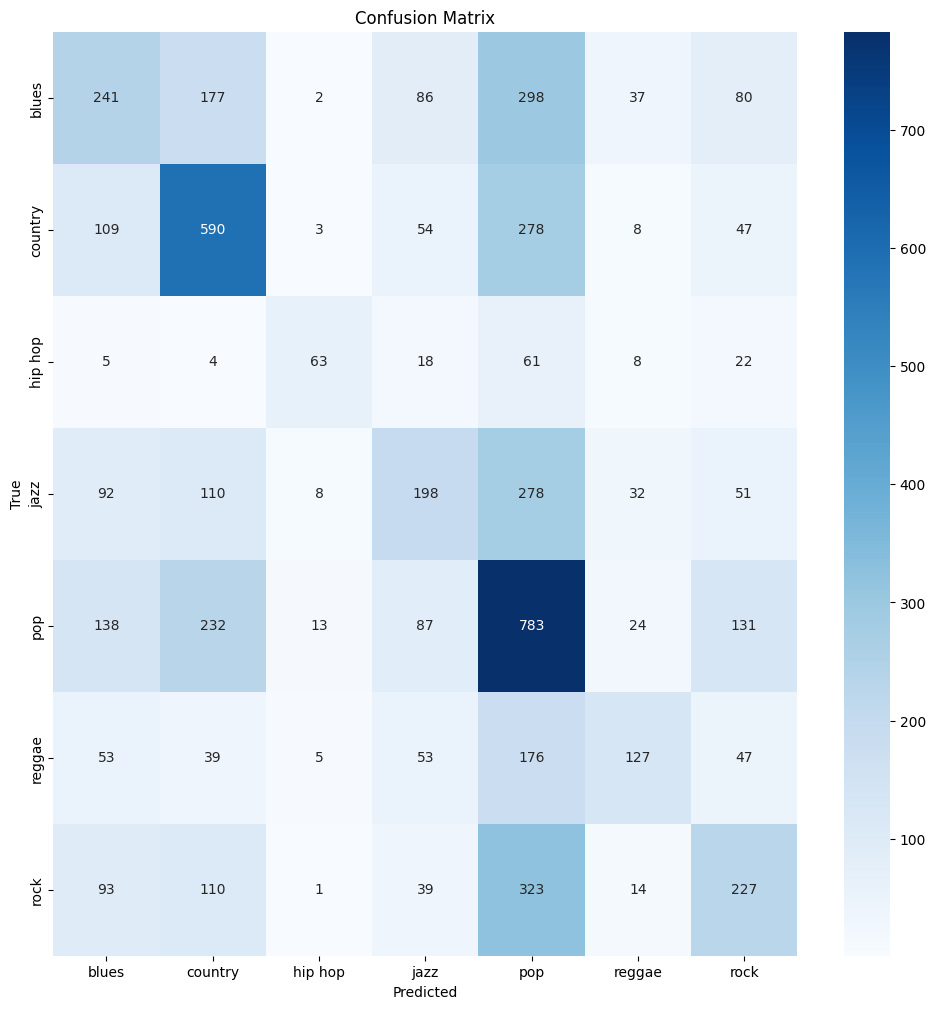

Accuracy: 0.3928


In [10]:
# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Modelling by Gridsearching over the best hyperparameters

In [11]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}


grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 1, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

       blues       0.33      0.26      0.29       921
     country       0.46      0.54      0.50      1089
     hip hop       0.65      0.34      0.44       181
        jazz       0.38      0.26      0.31       769
         pop       0.35      0.55      0.43      1408
      reggae       0.51      0.25      0.34       500
        rock       0.38      0.28      0.32       807

    accuracy                           0.39      5675
   macro avg       0.44      0.35      0.38      5675
weighted avg       0.40      0.39      0.38      5675



In [12]:
# import joblib

# # Save the model
# joblib.dump(best_model, 'genre_classification_model.pkl')

# # Save the vectorizer
# joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


**Inspecting the baseline split of genres in the data**

In [38]:
metadata['genre'].value_counts(normalize = True)

genre
pop        0.248202
country    0.191915
blues      0.162273
rock       0.142182
jazz       0.135521
reggae     0.088045
hip hop    0.031862
Name: proportion, dtype: float64

**Evaluating the models**

Model Performance: Both models have similar performance metrics. The accuracy remains the same (0.39), and other metrics like precision, recall, and F1-score show little to no improvement with tuning.

Hyperparameter Tuning: The hyperparameter tuning (with C: 1 and solver: newton-cg) did not lead to any significant improvement in the model's performance. This indicates that the chosen model and its current features might have reached their potential, and further improvements might require different approaches such as:
- Trying different models (e.g., Random Forest, SVM, Neural Networks).
- Engineering new features or using different text vectorization methods (e.g., Word2Vec, GloVe).
- Increasing the dataset size or improving the quality of the data.
